## Titanic Survival Rate
We will train a classifer that can predict the Survived column based on the other columns

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data

In [199]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring the data

In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Some Observations**
1. `PassengerId` is not meaningfull in training, it does not make any impact on survival.
2. `Survived` is our label, we need to separate it out.
3. `Pclass` is probable factor, because higher class passengers might have more survival rate than lower class passengers.
4. `Name` not a useful feature. Because what's in the name, unless it has some title like President or CEO!
5. `Sex` can be a factor, we will inspect it.
6. `Age` can also be a factor but we have lot of missing values which we need to fill up (Imputation)
7. `SibSp` is number of siblings / spouses aboard the Titanic. It can also be a deciding factor.
8. `Parch` is number  of parents / children aboard the Titanic. It can also be considered as a factor.
9. `Ticket` is ticker number and may not be that useful.
10. `Fare` The more fare one paid, better facilities and access to services one might have got. So this can be considered as a feature, but `Pclass` is related to this feature and `Pclass` is categorical so we might use one of these.
11. `Cabin` is the cabin number. It has lot of null values so we can drop this column.
12. `Embarked` is Port of Embarkation, not so sure about this, so we can investigate it further.

**PClass**

In [201]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

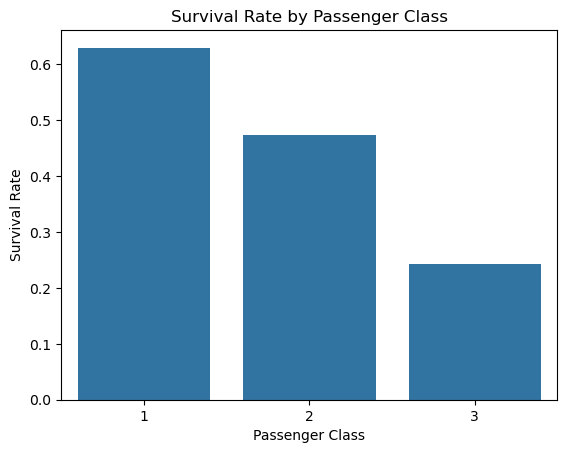

In [202]:
p_class_survival = df_train.groupby("Pclass")['Survived'].mean()
sns.barplot(x=p_class_survival.index, y=p_class_survival.values)

plt.title('Survival Rate by Passenger Class')
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

Higher passenger class has higher survival rate.

**Sex**

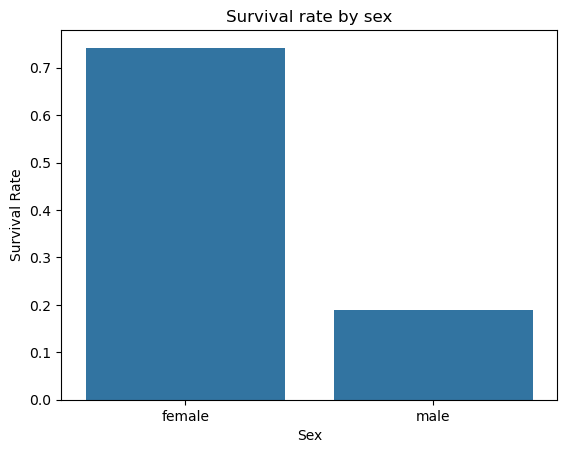

In [203]:
sex_survival = df_train.groupby("Sex")["Survived"].mean()
sns.barplot(x=sex_survival.index, y=sex_survival.values)
plt.title("Survival rate by sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

Females have relatively much higher survival rate, so this is one of the promising feature for classification.

**Age**

In [204]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

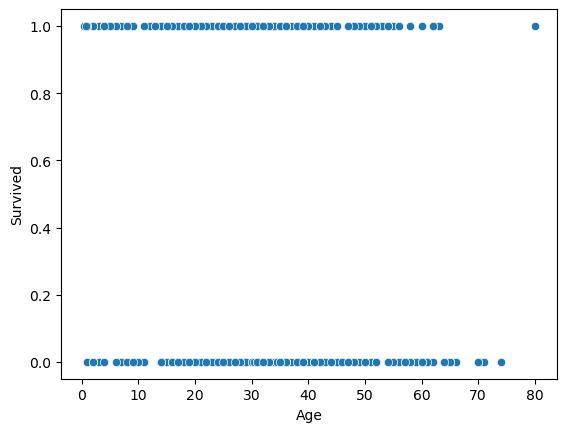

In [205]:
sns.scatterplot(x=df_train["Age"], y=df_train["Survived"])
plt.show()

The scatter plot shows a mixed signal, there is no clear decision boundary here. This exploration is not much useful, so lets create age groups and then visualise the relationship.

/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_16170/1261534260.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df_train.groupby("AgeGroup")["Survived"].mean()


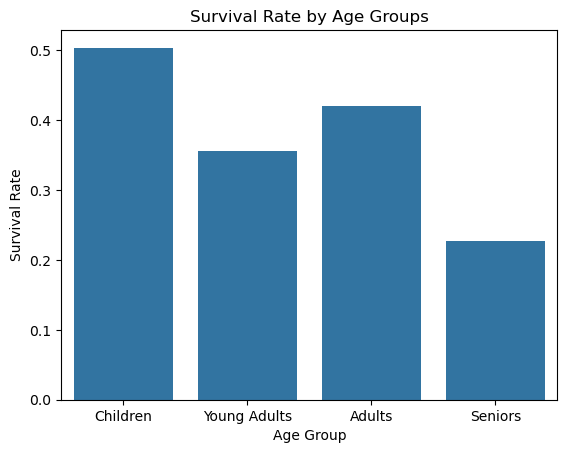

In [206]:
age_groups = [0, 18, 30, 60, 100]
labels = ['Children', 'Young Adults', 'Adults', 'Seniors']

df_train['AgeGroup'] = pd.cut(df_train["Age"], bins=age_groups, labels=labels)

# groupby AgeGroup
age_survival = df_train.groupby("AgeGroup")["Survived"].mean()

sns.barplot(x=age_survival.index, y=age_survival.values)
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.title("Survival Rate by Age Groups")
plt.show()

**Embarked**

In [207]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

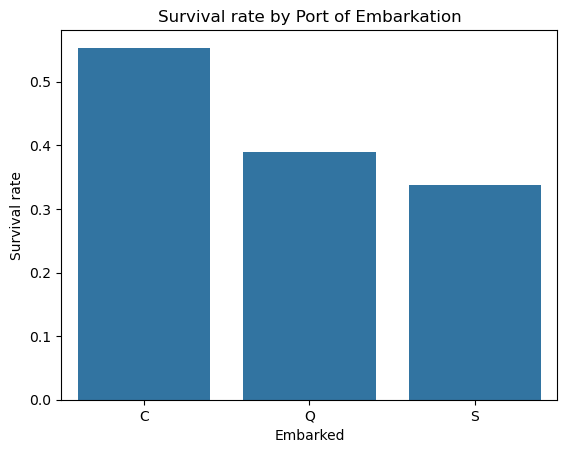

In [208]:
embarked_survival = df_train.groupby("Embarked")["Survived"].mean()
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.xlabel("Embarked")
plt.ylabel("Survival rate")
plt.title("Survival rate by Port of Embarkation")
plt.show()

Interesting, as I was not expecting this graph. Most people embarked their jounery from S (Southampton) but they survived the least, whereas people who embarked from C (Cherbourg) survived highest. This might be considered a factor, maybe there could be more information about how embarkment relates to survival rate.

**sibsp**

In [209]:
sibsp_survival = df_train.groupby("SibSp")['Survived'].mean()
sibsp_survival

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

**Parch**

In [210]:
parch_survival = df_train.groupby("Parch")['Survived'].mean()
parch_survival

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

We can combine `SibSp` and `Parch` to create a new feature `FamilySize`

In [211]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['FamilySize'].head()

0    1
1    1
2    0
3    1
4    0
Name: FamilySize, dtype: int64

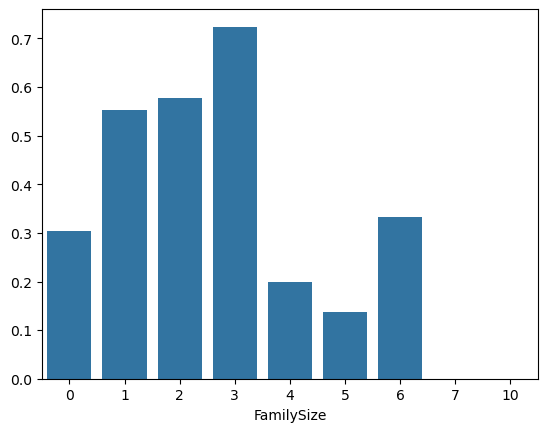

In [212]:
family_survival = df_train.groupby("FamilySize")['Survived'].mean()
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.show()

We can assume that bigger family size (>3) hindered the survival rate.

### Data Cleaning & Transformation

Handling missing data in `Age`

<Axes: ylabel='Frequency'>

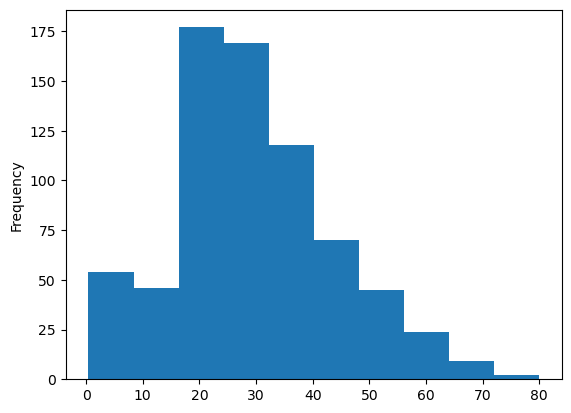

In [213]:
df_train["Age"].plot(kind="hist")

The age data looks skewed, so we can use median to fill the missing values.

In [214]:
median_age = df_train["Age"].median()
df_train["Age"] = df_train["Age"].fillna(median_age)
df_test["Age"] = df_test["Age"].fillna(median_age)

print("Imputed Age with media age", median_age)


Imputed Age with media age 28.0


In [215]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adults,0


In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     714 non-null    category
 13  FamilySize   891 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


In [217]:
embarked_mode = df_train["Embarked"].mode()[0]
df_train["Embarked"] = df_train["Embarked"].fillna(embarked_mode)
df_test["Embarked"] = df_test["Embarked"].fillna(embarked_mode)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  AgeGroup     714 non-null    category
 13  FamilySize   891 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


In [218]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
# feature engineering methods

def family_size(df):
    df["FamilySize"] = df["SibSp"] + df["Parch"]
    return df
        
def age_group(df):
        age_groups = [0, 18, 30, 60, 100]
        labels = ['Children', 'Young Adults', 'Adults', 'Seniors']

        df['AgeGroup'] = pd.cut(df["Age"], bins=age_groups, labels=labels)
        
def remove_features(df):
   return df.drop(["PassengerId", "Name", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis=1)

In [220]:
family_size(df_train)
family_size(df_test)

age_group(df_train)
age_group(df_test)

df_train_tr =  remove_features(df_train)
df_test_tr = remove_features(df_test)

In [221]:
df_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Embarked    891 non-null    object  
 4   AgeGroup    891 non-null    category
 5   FamilySize  891 non-null    int64   
dtypes: category(1), int64(3), object(2)
memory usage: 36.0+ KB


In [222]:
df_test_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Embarked    418 non-null    object  
 3   FamilySize  418 non-null    int64   
 4   AgeGroup    418 non-null    category
dtypes: category(1), int64(2), object(2)
memory usage: 13.8+ KB


### Encode textual data to numerical data
- Sex
- AgeGroup
- FamilySize
- Embarked

In [223]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    
def embarked_encoder(df):
    if "Embarked" in df.columns:
        encoder = OneHotEncoder(sparse_output=False)
        embarked_encoded = encoder.fit_transform(df[['Embarked']])
        print(encoder.categories_)
        embarked_categories = encoder.categories_
        columns = [f"Embarked_{category}" for category in embarked_categories[0]]

        df_encoded = pd.DataFrame(
            embarked_encoded, columns=columns, index=df.index)
        df = pd.concat([df, df_encoded], axis=1)
        
        df = df.drop("Embarked", axis=1)
    return df
    
    
def sex_encoder(df):
    if "Sex" in df.columns:
        label_encoder = LabelEncoder()
        df["SexEncoded"] = label_encoder.fit_transform(df["Sex"])
        print(label_encoder.classes_)
        df = df.drop("Sex", axis=1)
    return df
    
def age_group_encoder(df):
    if "AgeGroup" in df.columns:
        encoder = OneHotEncoder(sparse_output=False)
        age_encoded = encoder.fit_transform(df[['AgeGroup']])
        print(encoder.categories_)

        age_categories = encoder.categories_
        columns = [f"AgeGroup_{group}" for group in age_categories[0]]

        df_encoded = pd.DataFrame(age_encoded, columns=columns, index=df.index)
        df = pd.concat([df, df_encoded], axis=1)
        df = df.drop("AgeGroup", axis=1)
    return df
    

In [224]:
df_train_tr = embarked_encoder(df_train_tr)
df_train_tr = sex_encoder(df_train_tr)
df_train_tr = age_group_encoder(df_train_tr)


[array(['C', 'Q', 'S'], dtype=object)]
['female' 'male']
[array(['Adults', 'Children', 'Seniors', 'Young Adults'], dtype=object)]


In [225]:
df_test_tr.head()

,Pclass,Sex,Embarked,FamilySize,AgeGroup
0,3,male,Q,0,Adults
1,3,female,S,1,Adults
2,2,male,Q,0,Seniors
3,3,male,S,0,Young Adults
4,3,female,S,2,Young Adults


In [226]:
df_train_tr.head(2)

,Survived,Pclass,FamilySize,Embarked_C,Embarked_Q,Embarked_S,SexEncoded,AgeGroup_Adults,AgeGroup_Children,AgeGroup_Seniors,AgeGroup_Young Adults
0,0,3,1,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0
1,1,1,1,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0


In [227]:
df_test_tr = embarked_encoder(df_test_tr)
df_test_tr = sex_encoder(df_test_tr)
df_test_tr = age_group_encoder(df_test_tr)

[array(['C', 'Q', 'S'], dtype=object)]
['female' 'male']
[array(['Adults', 'Children', 'Seniors', 'Young Adults'], dtype=object)]


#### Separate Features and Labels

In [229]:
X_train = df_train_tr.drop("Survived", axis=1)

y_train = df_train_tr["Survived"].copy()

X_train.head(2)

,Pclass,FamilySize,Embarked_C,Embarked_Q,Embarked_S,SexEncoded,AgeGroup_Adults,AgeGroup_Children,AgeGroup_Seniors,AgeGroup_Young Adults
0,3,1,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0
1,1,1,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0


In [230]:
y_train[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Model Training

In [231]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [232]:
clf.fit(X_train, y_train)

RandomForestClassifier()

Check accouracy of model with training data only; we will use cross validation for this.
NOTE: we are not going to snoop into the test data yet!

In [234]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.77441077, 0.82154882, 0.8013468 ])

In [235]:
from sklearn.model_selection import cross_val_predict

y_train_prediction = cross_val_predict(clf, X_train, y_train, cv=3)

In [236]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_prediction)
cm

array([[485,  64],
       [117, 225]])

<Axes: >

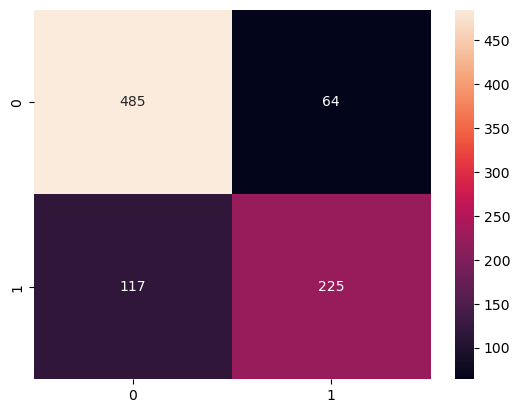

In [237]:
sns.heatmap(cm, annot=True, fmt='d')

False Negative (it was 0; not survived but predicted as 'survived') is quite high. We will need to reduce this error.

## Test data

In [238]:
X_test = df_test_tr
y_pred = clf.predict(X_test)

In [239]:
X_test.iloc[5], y_pred[5]

(Pclass                   3.0
 FamilySize               0.0
 Embarked_C               0.0
 Embarked_Q               0.0
 Embarked_S               1.0
 SexEncoded               1.0
 AgeGroup_Adults          0.0
 AgeGroup_Children        1.0
 AgeGroup_Seniors         0.0
 AgeGroup_Young Adults    0.0
 Name: 5, dtype: float64,
 np.int64(0))

In [240]:
clf.predict([X_test.iloc[5]])

/opt/anaconda3/envs/dsai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

Exporting the predicted data

In [246]:
y_pred_series = pd.Series(y_pred, name="Survived")
df = pd.concat([df_test["PassengerId"], y_pred_series], axis=1)
df.head()
df.to_csv("result.csv", index=False)